# Tuning SVM hyperparameters on spambase dataset

There are two hyperparameters

1. C - the regularization parameter
2. gamma - the kernel bandwidth for the Gaussian kernel

Both the hyperparameters are optimized on the log-scale. The loss function here is the square root of the misclassification rate.

In [1]:
import numpy as np
import pandas as pd

from fcvopt.optimizers.fcvopt import FCVOpt

from pmlb import fetch_data

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting display resolution of plots
mpl.rcParams['figure.dpi']= 150

In [3]:
# fetch spambase dataset
X, y = fetch_data('spambase', return_X_y=True, local_cache_dir='data/')
print(X.shape)
print(y.shape)

(4601, 57)
(4601,)


In [4]:
# define classifier object and the hyperparameter bounds
clf = Pipeline([('scale',StandardScaler()),
                 ('svc',SVC())])
param_bounds = {'svc__C':[np.exp(-10),np.exp(10)],
                'svc__gamma':[np.exp(-10),np.exp(10)]}

In [6]:
# optimizing square root of misclass rate
def sqrt_mcr(y_true,y_pred):
    return np.sqrt(1-accuracy_score(y_true,y_pred))

# define optimizer object
opt = FCVOpt(clf,param_bounds,sqrt_mcr,kernel="matern",
             logscale=np.array([0,1]),max_iter=40,
             integer = [],
             seed=1234,verbose=2,
             n_folds=5,n_init=3)

# tune hyperparameters
opt.run(X,y)

/home/syl1370/.local/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/syl1370/.local/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


  iter    f_best   acq_best    sigma_f
     0 5.286e-01 3.991e-01 9.511e-02
     1 5.150e-01 3.805e-01 9.520e-02
     2 5.099e-01 3.966e-01 8.737e-02
     3 3.892e-01 2.533e-01 1.084e-01
     4 3.171e-01 1.894e-01 1.177e-01
     5 2.838e-01 1.362e-01 1.367e-01
     6 2.551e-01 2.006e-01 1.304e-01
     7 2.603e-01 1.677e-01 1.398e-01
     8 2.539e-01 1.990e-01 1.388e-01
     9 2.696e-01 1.790e-01 1.449e-01
  iter    f_best   acq_best    sigma_f
    10 2.549e-01 2.203e-01 1.491e-01
    11 2.566e-01 2.187e-01 1.467e-01
    12 2.533e-01 2.303e-01 1.362e-01
    13 2.545e-01 2.243e-01 1.300e-01
    14 2.522e-01 2.329e-01 1.393e-01
    15 2.531e-01 2.402e-01 1.617e-01
    16 2.533e-01 2.425e-01 1.417e-01
    17 2.528e-01 2.433e-01 1.271e-01
    18 2.527e-01 2.415e-01 1.478e-01
    19 2.525e-01 2.438e-01 1.347e-01
  iter    f_best   acq_best    sigma_f
    20 2.521e-01 2.385e-01 1.351e-01
    21 2.522e-01 2.422e-01 1.324e-01
    22 2.530e-01 2.417e-01 1.458e-01
    23 2.529e-01 2.443e-01 1.533

{'x_best': array([2.20264658e+04, 4.53999298e-05]),
 'f_best': 0.25449825787476016,
 'acq_cand': 0.24793675495494727,
 'x_cand': array([1.47072085e+04, 7.76997677e-05])}

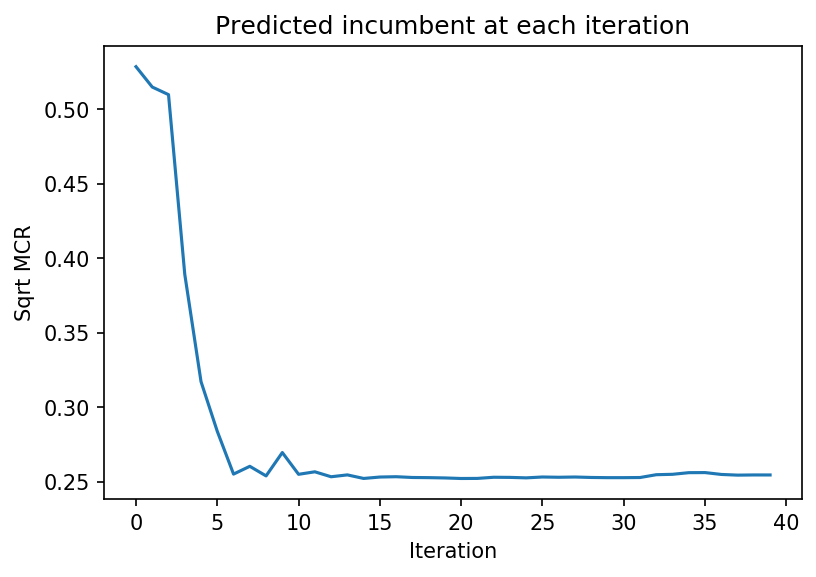

In [7]:
plt.figure()
plt.plot(opt.y_inc) # plot predicted incumbent value at each iteration
plt.xlabel('Iteration')
plt.ylabel('Sqrt MCR')
plt.title('Predicted incumbent at each iteration')
plt.show()

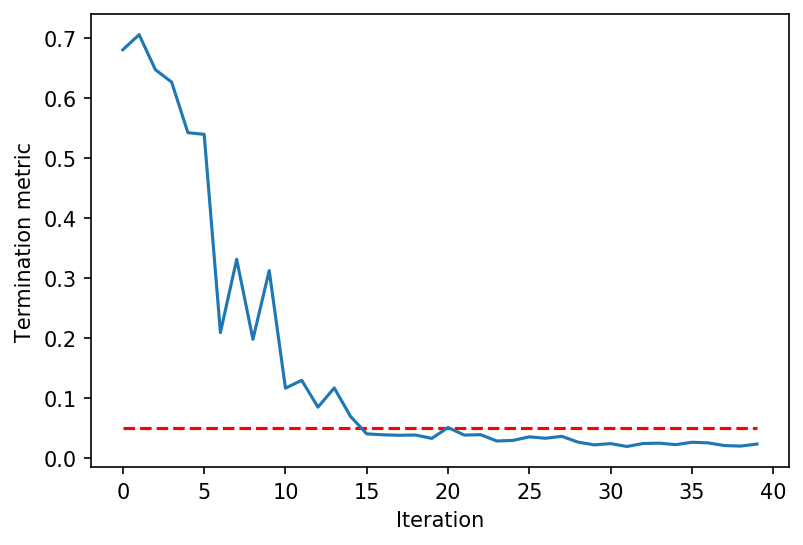

In [8]:
# plotting termination metric
plt.figure()
plt.hlines(0.05,0,opt.max_iter-1,
           linestyles="dashed",colors="red")
plt.plot(opt.term_crit())
plt.xlabel('Iteration')
plt.ylabel('Termination metric')
plt.show()